In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!git clone 'https://github.com/jacobgil/pytorch-grad-cam.git'

fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.


In [3]:
import sys
sys.path.append('/content/pytorch-grad-cam')
sys.path.append('/content/pytorch-grad-cam/pytorch-grad-cam')

In [4]:
import os

# Define the repository URL and the local directory where you want to clone/pull the repository
repo_url = 'https://github.com/aakashvardhan/s11-gradcam.git'
local_dir = '/content/s11-gradcam'



# Check if the local directory already exists
if not os.path.exists(local_dir):
    # Clone the repository because it does not exist
    !git clone {repo_url}
else:
    # Change directory to the local repository
    %cd {local_dir}
    # Pull the latest changes because the repository already exists
    !git pull

/content/s11-gradcam
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 3), reused 6 (delta 3), pack-reused 0
Unpacking objects: 100% (6/6), 1.19 KiB | 406.00 KiB/s, done.
From https://github.com/aakashvardhan/s11-gradcam
   993274d..f1668f9  main       -> origin/main
Updating 993274d..f1668f9
Fast-forward
 notebooks/show_gradcam_output.ipynb | 2 +-
 utils/misclassification.py          | 2 +-
 2 files changed, 2 insertions(+), 2 deletions(-)


In [5]:
sys.path.append('/content/s11-gradcam')
sys.path.append('/content/s11-gradcam/utils')

In [6]:
from models.resnet import ResNet18
from models.model_utils import model_summary
from main import set_seeds,setup_cifar10
from utils.misclassification import show_misclassified_images, plt_misclassified_images
from utils.gradcam import display_gradcam_output
from config import get_config
import torch
config = get_config()
set_seeds()

In [7]:
_, _, _, test_loader = setup_cifar10(config)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


In [8]:
device = config["device"]
model = ResNet18().to(device)
model_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [9]:
model.load_state_dict(torch.load('/content/s11-gradcam/saved_models/model_gradcam_bn.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

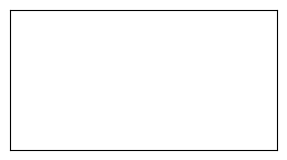

In [10]:
misclass_data = show_misclassified_images(model, test_loader, config)
plt_misclassified_images(config, misclass_data)

In [ ]:
!pip install ttach

In [ ]:
target_layers = [model.layer4[-1]]
display_gradcam_output(misclass_data,config['classes'],model,target_layers)